<a href="https://colab.research.google.com/github/harrymkwn/InfluenceAnalysis/blob/master/SentimentOnAngerData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initialization

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf

!pip install -q tensorflow-hub
!pip install -q tensorflow-datasets
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [101]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


#Import Data

In [182]:
df = pd.read_excel('clean-anger-train.xlsx',)

tweets = list(df['tweet'])
test_tweets = tweets[int(len(tweets)*.8) : ] 
tweets = tweets[:int((len(tweets))*.8)]
labels = list(df['label'])
test_labels = labels[int(len(labels)*.8):]
labels = labels[:int((len(labels))*.8)]
print(len(tweets),len(test_tweets))
print(len(labels),len(test_labels))


685 172
685 172


In [163]:
a = [1,2,3,4,5]
a = a[:3]
print(a)

[1, 2, 3]


#Tensorflow Hub

In [8]:
embadding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"

use = hub.load(embadding)

In [87]:
sent1 = use(["This is beautiful sun set point"])
print(sent1)

tf.Tensor(
[[ 1.2353983   0.36177874  1.0567257  -0.10924783 -1.764797   -0.59993666
  -1.3794618   0.1685736   0.45734888 -1.3003079  -0.7145367   1.0108852
   0.31591362 -0.533725   -1.0022223   0.53672945  0.45723101  0.19824666
  -1.0212995  -0.23935534]], shape=(1, 20), dtype=float32)


#Data PreProcessinng

In [ ]:
x_train = []
y_train = []
for tweet,label in zip(tweets,labels):
  tweet = tweet.strip()
  vector = use([tweet])
  print(vector)
  emb_vector = tf.reshape(vector,[-1]).numpy()/100
  x_train.append(emb_vector)

  y_train.append(float(label))

x = np.array(x_train)
y = np.array(y_train)

x_train = tf.Variable(x)
x_train = tf.reshape(x, [857,1,20])
print(x_train.shape)
print(y_train)

#Sentiment Analysis

In [94]:
model = tf.keras.Sequential()

# model.add(tf.keras.layers.Dense(units=256,input_shape=(x_train.shape[1], ),activation='relu'))
# model.add(tf.keras.layers.Dropout(rate=0.5))

# model.add(tf.keras.layers.LSTM(128, dropout=0.5, recurrent_dropout=0.5))
# # model.add(Dropout(0.2))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.add(tf.keras.layers.LSTM(10,batch_input_shape=(None,1,x_train.shape[2]),return_sequences=True))
# model.add(tf.keras.layers.LSTM(1,return_sequences=False))
model.compile(loss = 'mean_absolute_error',optimizer='adam',metrics=['accuracy'])


# model.compile(
#     loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#     optimizer=tf.keras.optimizers.Adam(0.001),
#     metrics=['accuracy']
# )

In [ ]:
# history = model.fit(
#     x_train, y_train,
#     epochs=100,
#     batch_size=16,
#     validation_split=0.1,
#     verbose=1,
#     shuffle=True
# )
history = model.fit(x_train,y_train,epochs=50)

In [ ]:
print(history.history['loss'])

In [ ]:
print(history.history['accuracy'])

#Our own Dictioinary

In [197]:
maxlength = 0;
for i in tweet:
  l = len(i.split(' '))
  if(maxlength<l):
    maxlength = l
print(maxlength)

41


In [223]:
tweet = df.tweet.values
print(tweet)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)

['   how the fur who the heck moved my fridge should i knock the landlord door angry mad        '
 '   so my indian user driver just called someone the n word if i wasnt in a moving vehicle id have jumped out disgusted        '
 '   pouk i asked for my parcel to be delivered to a pick up store not my address fuming poorcustomerservice   '
 '   so ef whichever butt wipe pulled the fire alarm in davis bc i was sound asleep pissed angry upset tired sad tired angry  '
 '   dont join bucare they put the phone down on you talk over you and are rude taking money out of my acc willynilly fuming  '
 '   my blood is boiling    '
 '   when youve still got a whole season of whitworth to watch and a stupid cunt in work ruins it for us ðÿðÿ kirstyga raging oldcunt     '
 '   btu why does tracking show my equipment delivered when it wasnt why is my service suddenly delayed weve already  weeks fuming       '
 '   teamshanny legit why i am so furious with him people are such fucking idiots'
 '   how is

In [224]:
print(tokenizer)

In [225]:
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweets)
padded_sequence = pad_sequences(encoded_docs, maxlen=maxlength)/1000

In [226]:
print(encoded_docs)

[[77, 1, 751, 54, 1, 752, 753, 8, 754, 78, 2, 755, 1, 756, 527, 31, 404], [22, 8, 405, 757, 758, 16, 528, 68, 1, 140, 341, 24, 2, 406, 10, 3, 250, 759, 225, 23, 407, 38, 529], [760, 2, 342, 14, 8, 761, 4, 17, 290, 4, 3, 291, 55, 762, 18, 8, 763, 61, 764], [22, 765, 530, 766, 767, 768, 1, 199, 531, 10, 769, 226, 2, 44, 532, 770, 408, 31, 771, 343, 533, 343, 31], [35, 772, 773, 56, 227, 1, 174, 200, 15, 6, 175, 100, 6, 5, 28, 534, 228, 409, 38, 9, 8, 535, 774, 61], [8, 201, 7, 108], [29, 536, 82, 65, 3, 251, 163, 9, 775, 4, 202, 5, 3, 410, 537, 10, 109, 538, 12, 14, 344, 115, 776, 110, 777], [778, 49, 164, 539, 252, 8, 779, 290, 29, 12, 406, 49, 7, 8, 345, 780, 781, 782, 411, 412, 61], [1495, 783, 49, 2, 74, 22, 101, 20, 84, 33, 28, 413, 152, 784], [77, 7, 12, 540, 4, 109, 24, 6, 57, 11, 253, 414, 254, 14, 785, 13, 69], [19, 22, 404, 39, 415, 541, 19, 1496, 19, 101], [292, 229, 416, 786, 787, 176, 141, 255, 70, 46, 203, 142, 61], [1497, 417, 21, 40, 1498, 6, 4, 17, 1, 346, 537, 1499, 4, 

In [227]:
print(tokenizer.word_index)

{'the': 1, 'i': 2, 'a': 3, 'to': 4, 'and': 5, 'you': 6, 'is': 7, 'my': 8, 'of': 9, 'in': 10, 'that': 11, 'it': 12, 'me': 13, 'for': 14, 'on': 15, 'just': 16, 'be': 17, 'not': 18, 'im': 19, 'with': 20, 'like': 21, 'so': 22, 'have': 23, 'if': 24, 'all': 25, 'at': 26, 'but': 27, 'are': 28, 'when': 29, 'this': 30, 'angry': 31, 'anger': 32, 'people': 33, 'its': 34, 'dont': 35, 'your': 36, 'no': 37, 'out': 38, 'about': 39, 'what': 40, 'rage': 41, 'from': 42, 'bitter': 43, 'was': 44, 'by': 45, 'get': 46, 'he': 47, 'ðÿ': 48, 'why': 49, 'as': 50, 'one': 51, 'we': 52, 'his': 53, 'who': 54, 'up': 55, 'they': 56, 'do': 57, 'revenge': 58, 'offended': 59, 'an': 60, 'fuming': 61, 'will': 62, 'now': 63, 'her': 64, 'got': 65, 'u': 66, 'can': 67, 'someone': 68, 'off': 69, 'cant': 70, 'think': 71, 'she': 72, 'amp': 73, 'am': 74, 'has': 75, 'snap': 76, 'how': 77, 'should': 78, 'know': 79, 'some': 80, 'because': 81, 'still': 82, 'or': 83, 'him': 84, 'been': 85, 'go': 86, 'really': 87, 'then': 88, 'never': 

In [228]:
print(tweet[0])
print(encoded_docs[0])

   how the fur who the heck moved my fridge should i knock the landlord door angry mad        
[77, 1, 751, 54, 1, 752, 753, 8, 754, 78, 2, 755, 1, 756, 527, 31, 404]


In [229]:
print(padded_sequence[0])

[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.077 0.001 0.751 0.054 0.001 0.752 0.753 0.008 0.754 0.078 0.002 0.755
 0.001 0.756 0.527 0.031 0.404]


#Model

In [240]:
embadding_vector_length = 24

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size,embadding_vector_length,input_length=maxlength))
model.add(tf.keras.layers.SpatialDropout1D(0.25))
model.add(tf.keras.layers.LSTM(50,dropout=0.1,recurrent_dropout=0.1))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

In [241]:

model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 41, 24)            81456     
_________________________________________________________________
spatial_dropout1d_7 (Spatial (None, 41, 24)            0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 50)                15000     
_________________________________________________________________
dropout_15 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 51        
Total params: 96,507
Trainable params: 96,507
Non-trainable params: 0
_________________________________________________________________


In [249]:
y = np.array(labels)
history = model.fit(padded_sequence,y,
                  validation_split=0.2, epochs=100)

Epoch 1/100
18/18 [==============================] - 1s 50ms/step - loss: 0.6681 - accuracy: 0.0000e+00 - val_loss: 0.7379 - val_accuracy: 0.0000e+00
Epoch 2/100
18/18 [==============================] - 1s 48ms/step - loss: 0.6687 - accuracy: 0.0000e+00 - val_loss: 0.7287 - val_accuracy: 0.0000e+00
Epoch 3/100
18/18 [==============================] - 1s 47ms/step - loss: 0.6679 - accuracy: 0.0000e+00 - val_loss: 0.7208 - val_accuracy: 0.0000e+00
Epoch 4/100
18/18 [==============================] - 1s 46ms/step - loss: 0.6668 - accuracy: 0.0000e+00 - val_loss: 0.7285 - val_accuracy: 0.0000e+00
Epoch 5/100
18/18 [==============================] - 1s 46ms/step - loss: 0.6680 - accuracy: 0.0000e+00 - val_loss: 0.7257 - val_accuracy: 0.0000e+00
Epoch 6/100
18/18 [==============================] - 1s 51ms/step - loss: 0.6670 - accuracy: 0.0000e+00 - val_loss: 0.7199 - val_accuracy: 0.0000e+00
Epoch 7/100
18/18 [==============================] - 1s 48ms/step - loss: 0.6667 - accuracy: 0.0000e

In [243]:
print(history.history['accuracy'])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [244]:
test_word ="This is soo sad"
tw = tokenizer.texts_to_sequences([test_word])
tw = pad_sequences(tw,maxlen=200)
prediction = int(model.predict(tw).round().item())
# sentiment_label[1][prediction]
print(prediction)

1


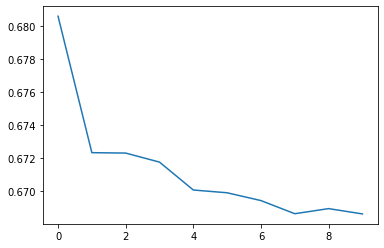

In [245]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.show()

In [246]:
print(len(test_tweets))
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(test_tweets)
test_padded_sequence = pad_sequences(encoded_docs, maxlen=maxlength)/1000
print(test_padded_sequence.shape)

172
(172, 41)


In [247]:
results = model.predict(test_padded_sequence)
results.shape
np.reshape(results,172)

array([0.6174078 , 0.61477935, 0.54294884, 0.59324324, 0.6183989 ,
       0.5807023 , 0.6243831 , 0.5629448 , 0.64642173, 0.601605  ,
       0.553657  , 0.6259388 , 0.630982  , 0.5427903 , 0.62660676,
       0.6127009 , 0.62511504, 0.6388446 , 0.5861892 , 0.6199478 ,
       0.544944  , 0.5583547 , 0.63154846, 0.5980601 , 0.58465236,
       0.6253499 , 0.6086683 , 0.59358764, 0.61006486, 0.5624993 ,
       0.6067762 , 0.60975623, 0.64642173, 0.62416893, 0.6312882 ,
       0.57934284, 0.60488665, 0.6023166 , 0.6263634 , 0.616586  ,
       0.62308645, 0.64642173, 0.6296615 , 0.586623  , 0.60229236,
       0.60735315, 0.649931  , 0.5823432 , 0.6053748 , 0.589357  ,
       0.64642173, 0.6042258 , 0.63167727, 0.59331983, 0.59178746,
       0.6444935 , 0.62441707, 0.5485726 , 0.57921314, 0.5477277 ,
       0.56989926, 0.6052731 , 0.58875525, 0.6062612 , 0.5716497 ,
       0.6107994 , 0.60360247, 0.6060194 , 0.6073561 , 0.6157087 ,
       0.6057743 , 0.58414924, 0.5994857 , 0.6151434 , 0.62718

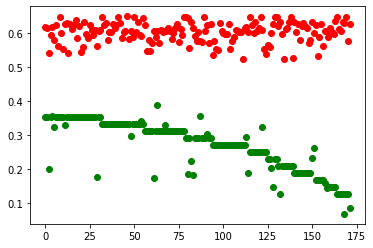

In [248]:
plt.scatter(range(172),test_labels,c='g')
plt.scatter(range(172),results,c='r')
plt.show()